Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

Importing data set

In [2]:
dataset = pd.read_csv('/content/archive (5).zip')

In [3]:
#To see the first five rows of the dataset we can use dataset.head()
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.isnull().sum().sum()

0

There is no null value in the dataset

In [5]:
dataset['class'].unique()

array(['p', 'e'], dtype=object)

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

In [6]:
# To see if there is any null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features are categorical and there is no missing value.

In [7]:
#To find number of rows and column
dataset.shape

(8124, 23)

target class seperating

In [8]:
X = dataset.drop(['class'],axis=1)
y = dataset['class']

As all the values in the dataset are categorical.
X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [9]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as
Poisonous = p -> 1
Edible = e -> 0

test train split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [13]:
y_train.shape , y_test.shape

((6499,), (1625,))

model implementation

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
from sklearn.metrics import accuracy_score

using gini index

In [21]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 4.

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(0.5625, 0.9, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3125, 0.7, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.1875, 0.5, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.125, 0.3, 'x[33] <= 0.5\ngini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.0625, 0.1, 'gini = 0.495\nsamples = 158\nvalue = [87, 71]'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 2922\nvalue = [0, 2922]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.4375, 0.5, 'x[65] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.8125, 0.7, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.75, 0.5, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.625, 0.3, 'x[7] <= 0.5\ngini = 0.002\nsamples = 2740\nvalue =

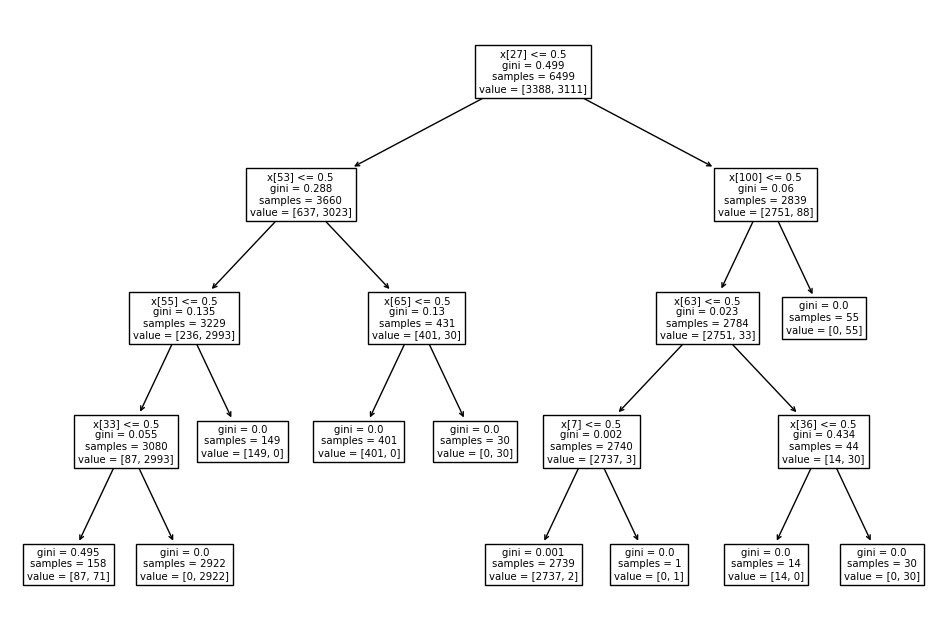

In [22]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [23]:
#Predict the values
y_pred_gini = clf_gini.predict(X_test)

Overfitting occurs when accuracy for traning set is high and test set is very low comparing to training set. Overfitting is very common problem with decision tree.

In [24]:
#Predict the value using X train for accuracy comparision
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 0, 1])

In [25]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9834
Training-set accuracy score: 0.9888


using entropy

In [26]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737, 3]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14, 30]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\ns

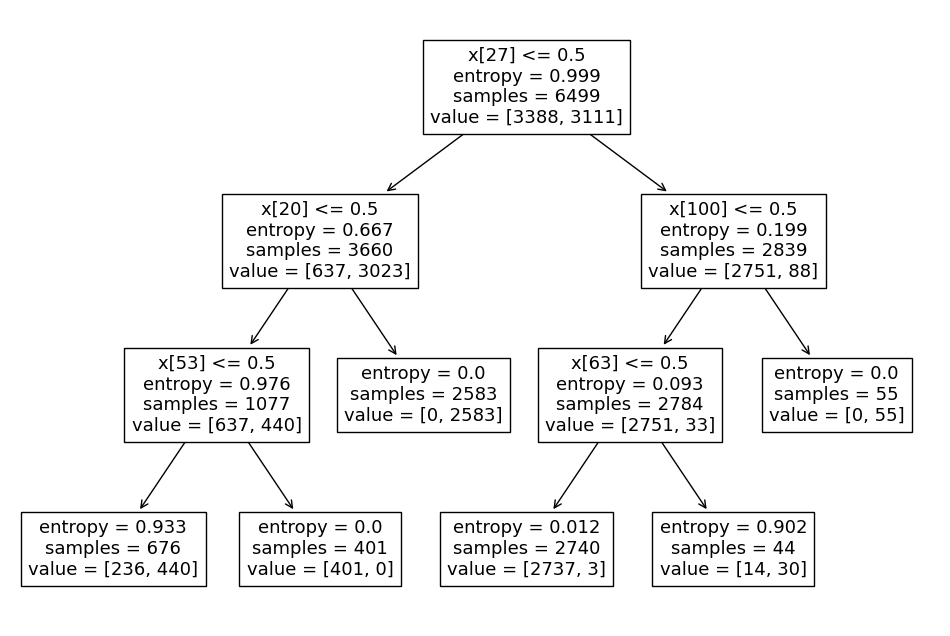

In [27]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

In [28]:
#Predict the values
y_pred_en = clf_en.predict(X_test)

In [29]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [30]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9637
Training-set accuracy score: 0.9611


In [31]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9611
Test set score: 0.9637


confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [33]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[766  54]
 [  5 800]]
